# Marvel Comics Pybites Challenge

## Goals

These are the goals for this challenge:

1. Get the most popular characters based on the number of appearances they made in comics over the years.
2. Get the year with most and least new Marvel characters introduced respectively, return a (max_year, min_year) tuple. Expect min/max to be pretty far apart.
3. What percentage of the comics characters is female? Please give us the percentage rounded to 2 digits.
4. Good vs bad characters: return a dictionary of bad vs good vs neutral characters per sex. The keys are Bad Characters, Good Characters, Neutral Characters, the values are integer percentages. Who plays the villain more often, a man or a woman?

## Setup

Import libraries and print out list of files in the work folder.

In [2]:
#import libs
import pandas as pd
import seaborn as sns

#Enable inline plots
%matplotlib inline

#List the files in the work folder
from subprocess import check_output
print(check_output(["ls", "../work"]).decode("utf8"))

Business Finances.ipynb
IBNK1117.CSV
Marvel Comics Data.ipynb
marvel-wikia-data.csv
Test.ipynb
Untitled.ipynb



## Get Data

Import the data from a csv file into a Pandas dataframe and examine.

In [3]:
df = pd.read_csv('../work/marvel-wikia-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
page_id             16376 non-null int64
name                16376 non-null object
urlslug             16376 non-null object
ID                  12606 non-null object
ALIGN               13564 non-null object
EYE                 6609 non-null object
HAIR                12112 non-null object
SEX                 15522 non-null object
GSM                 90 non-null object
ALIVE               16373 non-null object
APPEARANCES         15280 non-null float64
FIRST APPEARANCE    15561 non-null object
Year                15561 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [4]:
#Show first few rows of the dataframe
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
#Describe the numeric values in the dataframe
df.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


## Cleanse

Fix up the data a bit to make it more manageable. I will perform the following tasks to clean the data:

* Drop unused columns
* Make all the column names consistant
* Clean the values in align, sex and alive. Remove the word Characters from the values.
* Fill in the empty values

In [6]:
#The following columns can be dropped as they don't contribute towards the goals of the challenge
df = df.drop(['GSM','urlslug', 'page_id', 'EYE', 'HAIR', 'ID'], axis=1)
#Make all the columns lower case
df.columns = map(str.lower, df.columns)
df.head()

,name,align,sex,alive,appearances,first appearance,year
0,Spider-Man (Peter Parker),Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Good Characters,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),Good Characters,Male Characters,Living Characters,2258.0,Nov-50,1950.0


In [7]:
#Check what the unique values for alive are
df.alive.unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [8]:
#Remove the word characters from alive, sex and align
df['alive'] = df['alive'].str.replace(' Characters', '')
df['sex'] = df['sex'].str.replace(' Characters', '')
df['align'] = df['align'].str.replace(' Characters', '')
df.head()

,name,align,sex,alive,appearances,first appearance,year
0,Spider-Man (Peter Parker),Good,Male,Living,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Good,Male,Living,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral,Male,Living,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good,Male,Living,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),Good,Male,Living,2258.0,Nov-50,1950.0


In [9]:
#Check wich columns have empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 7 columns):
name                16376 non-null object
align               13564 non-null object
sex                 15522 non-null object
alive               16373 non-null object
appearances         15280 non-null float64
first appearance    15561 non-null object
year                15561 non-null float64
dtypes: float64(2), object(5)
memory usage: 895.6+ KB


In [10]:
#Fill empty values for appearances, align and sex
df.appearances = df.appearances.fillna(1)
df.align = df['align'].fillna('Unknown')
df.sex = df.sex.fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 7 columns):
name                16376 non-null object
align               13564 non-null object
sex                 16376 non-null object
alive               16373 non-null object
appearances         16376 non-null float64
first appearance    15561 non-null object
year                15561 non-null float64
dtypes: float64(2), object(5)
memory usage: 895.6+ KB


## Solve Challenges
### 1. Characters with most appearances

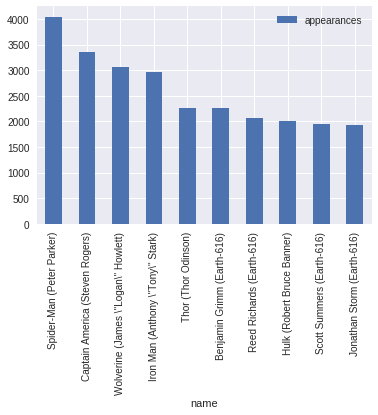

In [11]:
#Sort appearances in descending order
newdf = df.sort_values(by=['appearances'], ascending=False).head(10)
#Plot a graph of top 10 characters with most appearances
newdf.plot(kind='bar', x='name', y='appearances')

### 2. Years with most and least new characters

In [12]:
#Get the year with most and least new Marvel characters introduced respectively, return a (max_year, min_year) tuple. Expect min/max to be pretty far apart.
new = df.groupby(df['year'])['name'].count().reset_index()
minNewChars = new.sort_values(by=['name']).head(1)['year'].iloc[0]
maxNewChars = new.sort_values(by=['name']).tail(1)['year'].iloc[0]
newChars = (int(maxNewChars), int(minNewChars))
newChars

(1993, 1958)

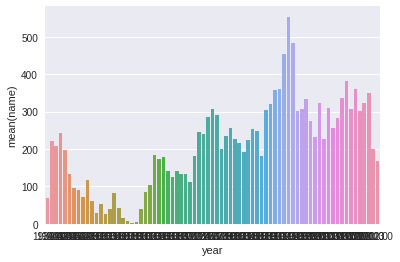

In [13]:
#Plot bar graph of character introductions per year
sns.barplot(x='year', y='name', data=new)

### 3. Percentage of female characters

In [14]:
#What percentage of the comics characters is female? Please give us the percentage rounded to 2 digits.
sex = df.groupby(by=df['sex'])['name'].count().reset_index(name='count')
sex['percent'] = sex['count'] / sex['count'].sum() * 100
sex['percent'] = sex['percent'].round(2)
sex = sex.set_index('sex')
percentagefemale = sex.at['Female', 'percent']
print('Percentage of female characters', percentagefemale, '%')

Percentage of female characters 23.43 %


### 4. Good vs Bad Characters

In [40]:
#Group by alignment and sex and do a count for each group
goodvbad = df.groupby(by=['align', 'sex'])['name'].count().reset_index(name='count')
#Create a percentage column
goodvbad['percent'] = goodvbad['count'] / goodvbad['count'].sum() * 100
goodvbad['percent'] = goodvbad['percent'].round(2)
#Add an index so that I can select rows for specific groupings
goodvbad['index'] = goodvbad['align'].map(str) + goodvbad['sex']
goodvbad = goodvbad.set_index('index')
goodvbad['alignsex'] = goodvbad.index
goodvbad

,align,sex,count,percent,alignsex
index,,,,,
BadAgender,Bad,Agender,20,0.15,BadAgender
BadFemale,Bad,Female,976,7.20,BadFemale
BadMale,Bad,Male,5338,39.35,BadMale
BadUnknown,Bad,Unknown,386,2.85,BadUnknown
GoodAgender,Good,Agender,10,0.07,GoodAgender
GoodFemale,Good,Female,1537,11.33,GoodFemale
GoodGenderfluid,Good,Genderfluid,1,0.01,GoodGenderfluid
GoodMale,Good,Male,2966,21.87,GoodMale
GoodUnknown,Good,Unknown,122,0.90,GoodUnknown


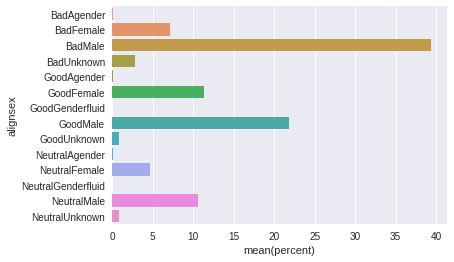

In [42]:
#Create a chart of the distribution of alignment and sex
sns.barplot(x='percent', y='alignsex', data=goodvbad)

In [43]:
#Show the percentage of bad males
percentagebadmales = goodvbad.at['BadMale', 'percent']
print('Percentage of Bad Males: ', int(percentagebadmales))

Percentage of Bad Males:  39


In [44]:
#Show the percentage of bad females
percentagebadfemales = goodvbad.at['BadFemale', 'percent']
print('Percentage of Bad Females: ', int(percentagebadfemales))

Percentage of Bad Females:  7


It would seem that the villain is more often a male than female. From the chart above we can also see that there are more bad male characters than any other kind.